In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

Importing all the hospital datasets

In [2]:
appt = pd.read_csv(r"C:\Users\HP\Documents\Data Analysis\PORTFOLIO\Completed Projects\Hospital\Hospital Management Dataset\appointments.csv")
(appt)
#appt.duplicated().value_counts()

,appointment_id,patient_id,doctor_id,appointment_date,appointment_time,reason_for_visit,status
0,A001,P034,D009,2023-08-09,15:15:00,Therapy,Scheduled
1,A002,P032,D004,2023-06-09,14:30:00,Therapy,No-show
2,A003,P048,D004,2023-06-28,8:00:00,Consultation,Cancelled
3,A004,P025,D006,2023-09-01,9:15:00,Consultation,Cancelled
4,A005,P040,D003,2023-07-06,12:45:00,Emergency,No-show
...,...,...,...,...,...,...,...
195,A196,P045,D006,2023-10-26,9:45:00,Checkup,Cancelled
196,A197,P001,D005,2023-04-01,13:30:00,Emergency,No-show
197,A198,P022,D006,2023-05-15,8:30:00,Therapy,No-show
198,A199,P017,D001,2023-05-01,12:45:00,Follow-up,Completed


In [3]:
billing = pd.read_csv(r"C:\Users\HP\Documents\Data Analysis\PORTFOLIO\Completed Projects\Hospital\Hospital Management Dataset\billing.csv")
(billing)

,bill_id,patient_id,treatment_id,bill_date,amount,payment_method,payment_status
0,B001,P034,T001,2023-08-09,3941.97,Insurance,Pending
1,B002,P032,T002,2023-06-09,4158.44,Insurance,Paid
2,B003,P048,T003,2023-06-28,3731.55,Insurance,Paid
3,B004,P025,T004,2023-09-01,4799.86,Insurance,Failed
4,B005,P040,T005,2023-07-06,582.05,Credit Card,Pending
...,...,...,...,...,...,...,...
195,B196,P045,T196,2023-10-26,2477.80,Cash,Pending
196,B197,P001,T197,2023-04-01,975.49,Cash,Pending
197,B198,P022,T198,2023-05-15,3383.72,Cash,Failed
198,B199,P017,T199,2023-05-01,1472.17,Credit Card,Paid


In [4]:
dr = pd.read_csv(r"C:\Users\HP\Documents\Data Analysis\PORTFOLIO\Completed Projects\Hospital\Hospital Management Dataset\doctors.csv")
dr["dr's_name"] = dr["first_name"] + " " + dr["last_name"]
(dr)

,doctor_id,first_name,last_name,specialization,phone_number,years_experience,hospital_branch,email,dr's_name
0,D001,David,Taylor,Dermatology,8322010158,17,Westside Clinic,dr.david.taylor@hospital.com,David Taylor
1,D002,Jane,Davis,Pediatrics,9004382050,24,Eastside Clinic,dr.jane.davis@hospital.com,Jane Davis
2,D003,Jane,Smith,Pediatrics,8737740598,19,Eastside Clinic,dr.jane.smith@hospital.com,Jane Smith
3,D004,David,Jones,Pediatrics,6594221991,28,Central Hospital,dr.david.jones@hospital.com,David Jones
4,D005,Sarah,Taylor,Dermatology,9118538547,26,Central Hospital,dr.sarah.taylor@hospital.com,Sarah Taylor
5,D006,Alex,Davis,Pediatrics,6570137231,23,Central Hospital,dr.alex.davis@hospital.com,Alex Davis
6,D007,Robert,Davis,Oncology,8217493115,26,Westside Clinic,dr.robert.davis@hospital.com,Robert Davis
7,D008,Linda,Brown,Dermatology,9069162601,5,Westside Clinic,dr.linda.brown@hospital.com,Linda Brown
8,D009,Sarah,Smith,Pediatrics,7387087517,26,Central Hospital,dr.sarah.smith@hospital.com,Sarah Smith
9,D010,Linda,Wilson,Oncology,6176383634,21,Eastside Clinic,dr.linda.wilson@hospital.com,Linda Wilson


In [5]:
patients = pd.read_csv(r"C:\Users\HP\Documents\Data Analysis\PORTFOLIO\Completed Projects\Hospital\Hospital Management Dataset\patients.csv")
patients.head(5)

,patient_id,first_name,last_name,gender,date_of_birth,contact_number,address,registration_date,insurance_provider,insurance_number,email
0,P001,David,Williams,F,1955-06-04,6939585183,789 Pine Rd,2022-06-23,WellnessCorp,INS840674,david.williams@mail.com
1,P002,Emily,Smith,F,1984-10-12,8228188767,321 Maple Dr,2022-01-15,PulseSecure,INS354079,emily.smith@mail.com
2,P003,Laura,Jones,M,1977-08-21,8397029847,321 Maple Dr,2022-02-07,PulseSecure,INS650929,laura.jones@mail.com
3,P004,Michael,Johnson,F,1981-02-20,9019443432,123 Elm St,2021-03-02,HealthIndia,INS789944,michael.johnson@mail.com
4,P005,David,Wilson,M,1960-06-23,7734463155,123 Elm St,2021-09-29,MedCare Plus,INS788105,david.wilson@mail.com


In [6]:
treatment = pd.read_csv(r"C:\Users\HP\Documents\Data Analysis\PORTFOLIO\Completed Projects\Hospital\Hospital Management Dataset\treatments.csv")
treatment.drop_duplicates()

,treatment_id,appointment_id,treatment_type,description,cost,treatment_date
0,T001,A001,Chemotherapy,Basic screening,3941.97,2023-08-09
1,T002,A002,MRI,Advanced protocol,4158.44,2023-06-09
2,T003,A003,MRI,Standard procedure,3731.55,2023-06-28
3,T004,A004,MRI,Basic screening,4799.86,2023-09-01
4,T005,A005,ECG,Standard procedure,582.05,2023-07-06
...,...,...,...,...,...,...
195,T196,A196,Chemotherapy,Advanced protocol,2477.80,2023-10-26
196,T197,A197,Physiotherapy,Standard procedure,975.49,2023-04-01
197,T198,A198,ECG,Basic screening,3383.72,2023-05-15
198,T199,A199,Chemotherapy,Basic screening,1472.17,2023-05-01


In [7]:
# checking for duplicates in the appointment table. 
appt.duplicated().value_counts()

False    200
Name: count, dtype: int64

In [8]:
# checking for null value in the treatment table
treatment.isnull().value_counts()

treatment_id  appointment_id  treatment_type  description  cost   treatment_date
False         False           False           False        False  False             200
Name: count, dtype: int64

### Adding two new columns to the patients table. 

    a. Full name column
    b. Age column

In [9]:
# concatenating first_name and last_name into a new column full_name
patients["full_name"]= patients["first_name"] + " " + patients["last_name"]

In [10]:
# converting date of birth column into datetime
patients["date_of_birth"]= pd.to_datetime(patients["date_of_birth"])

# importing today's date
from datetime import date
today = pd.to_datetime(date.today()) 

# creating column for age of patients 
patients["age"] = ((today - patients["date_of_birth"]).dt.days / 365.25).astype(int)
(patients)

,patient_id,first_name,last_name,gender,date_of_birth,contact_number,address,registration_date,insurance_provider,insurance_number,email,full_name,age
0,P001,David,Williams,F,1955-06-04,6939585183,789 Pine Rd,2022-06-23,WellnessCorp,INS840674,david.williams@mail.com,David Williams,70
1,P002,Emily,Smith,F,1984-10-12,8228188767,321 Maple Dr,2022-01-15,PulseSecure,INS354079,emily.smith@mail.com,Emily Smith,41
2,P003,Laura,Jones,M,1977-08-21,8397029847,321 Maple Dr,2022-02-07,PulseSecure,INS650929,laura.jones@mail.com,Laura Jones,48
3,P004,Michael,Johnson,F,1981-02-20,9019443432,123 Elm St,2021-03-02,HealthIndia,INS789944,michael.johnson@mail.com,Michael Johnson,44
4,P005,David,Wilson,M,1960-06-23,7734463155,123 Elm St,2021-09-29,MedCare Plus,INS788105,david.wilson@mail.com,David Wilson,65
5,P006,Linda,Jones,M,1963-06-16,7561777264,321 Maple Dr,2022-10-02,HealthIndia,INS613758,linda.jones@mail.com,Linda Jones,62
6,P007,Alex,Johnson,F,1989-06-08,6278710077,789 Pine Rd,2021-12-25,MedCare Plus,INS465890,alex.johnson@mail.com,Alex Johnson,36
7,P008,David,Davis,F,1976-07-05,7090558393,456 Oak Ave,2021-05-25,WellnessCorp,INS545101,david.davis@mail.com,David Davis,49
8,P009,Laura,Davis,M,1971-12-11,7060324619,321 Maple Dr,2022-09-18,PulseSecure,INS136631,laura.davis@mail.com,Laura Davis,54
9,P010,Michael,Taylor,M,2001-10-13,7081396733,123 Elm St,2022-08-24,WellnessCorp,INS866577,michael.taylor@mail.com,Michael Taylor,24


## Creating a new DataFrame for my columns of interest

### New patient table

In [36]:
patient = patients[["patient_id","full_name", "gender", "age", "insurance_provider"]]
patient.head(5)

,patient_id,full_name,gender,age,insurance_provider
0,P001,David Williams,F,70,WellnessCorp
1,P002,Emily Smith,F,41,PulseSecure
2,P003,Laura Jones,M,48,PulseSecure
3,P004,Michael Johnson,F,44,HealthIndia
4,P005,David Wilson,M,65,MedCare Plus


### New Doctors table

In [12]:
doc = dr[["doctor_id", "dr's_name", "hospital_branch"]]
(doc)

,doctor_id,dr's_name,hospital_branch
0,D001,David Taylor,Westside Clinic
1,D002,Jane Davis,Eastside Clinic
2,D003,Jane Smith,Eastside Clinic
3,D004,David Jones,Central Hospital
4,D005,Sarah Taylor,Central Hospital
5,D006,Alex Davis,Central Hospital
6,D007,Robert Davis,Westside Clinic
7,D008,Linda Brown,Westside Clinic
8,D009,Sarah Smith,Central Hospital
9,D010,Linda Wilson,Eastside Clinic


### Creating Hospital DataFrame

In [13]:
hospital = appt.merge(patient, on ="patient_id", how = "left")
hospital = hospital.merge(doc, on = "doctor_id", how = "left")
hospital = hospital.merge(treatment, on ="appointment_id", how = "left")
hospital = hospital.merge(billing.drop(["patient_id"], axis=1), on ="treatment_id", how = "left")

# drop some unnecessary columns 
hospital = hospital.drop([ "appointment_time", "bill_date", "amount", "treatment_date", "treatment_id", "bill_id"], axis=1)
hospital = hospital.drop_duplicates()
(hospital)

,appointment_id,patient_id,doctor_id,appointment_date,reason_for_visit,status,full_name,gender,age,insurance_provider,dr's_name,hospital_branch,treatment_type,description,cost,payment_method,payment_status
0,A001,P034,D009,2023-08-09,Therapy,Scheduled,Alex Smith,F,75,WellnessCorp,Sarah Smith,Central Hospital,Chemotherapy,Basic screening,3941.97,Insurance,Pending
1,A002,P032,D004,2023-06-09,Therapy,No-show,Alex Moore,M,44,MedCare Plus,David Jones,Central Hospital,MRI,Advanced protocol,4158.44,Insurance,Paid
2,A003,P048,D004,2023-06-28,Consultation,Cancelled,Emily Miller,M,42,PulseSecure,David Jones,Central Hospital,MRI,Standard procedure,3731.55,Insurance,Paid
3,A004,P025,D006,2023-09-01,Consultation,Cancelled,Robert Wilson,M,59,HealthIndia,Alex Davis,Central Hospital,MRI,Basic screening,4799.86,Insurance,Failed
4,A005,P040,D003,2023-07-06,Emergency,No-show,Emily Williams,M,53,PulseSecure,Jane Smith,Eastside Clinic,ECG,Standard procedure,582.05,Credit Card,Pending
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,A196,P045,D006,2023-10-26,Checkup,Cancelled,Linda Miller,F,59,MedCare Plus,Alex Davis,Central Hospital,Chemotherapy,Advanced protocol,2477.80,Cash,Pending
196,A197,P001,D005,2023-04-01,Emergency,No-show,David Williams,F,70,WellnessCorp,Sarah Taylor,Central Hospital,Physiotherapy,Standard procedure,975.49,Cash,Pending
197,A198,P022,D006,2023-05-15,Therapy,No-show,John Brown,M,70,MedCare Plus,Alex Davis,Central Hospital,ECG,Basic screening,3383.72,Cash,Failed
198,A199,P017,D001,2023-05-01,Follow-up,Completed,Jane Jones,M,34,WellnessCorp,David Taylor,Westside Clinic,Chemotherapy,Basic screening,1472.17,Credit Card,Paid


In [14]:
# Changing the appointment date data type to datetime
hospital["appointment_date"]= pd.to_datetime(hospital["appointment_date"])

### What is the total expected revenue for the year?

In [15]:
total_rev = hospital["cost"].sum().round(2)
print ("Total Expected Revenue:  ", total_rev)

Total Expected Revenue:   551249.85


### What is the Total actualized revenue?

In [16]:
# Filtering rows where payment_status is "paid" and sum the cost column
actual_rev = hospital[hospital["payment_status"].str.lower() == "paid"]["cost"].sum().round(2)
print("Total Actualized Revenue:", actual_rev)


Total Actualized Revenue: 173424.9


### What is the reason for coming to the hospital?

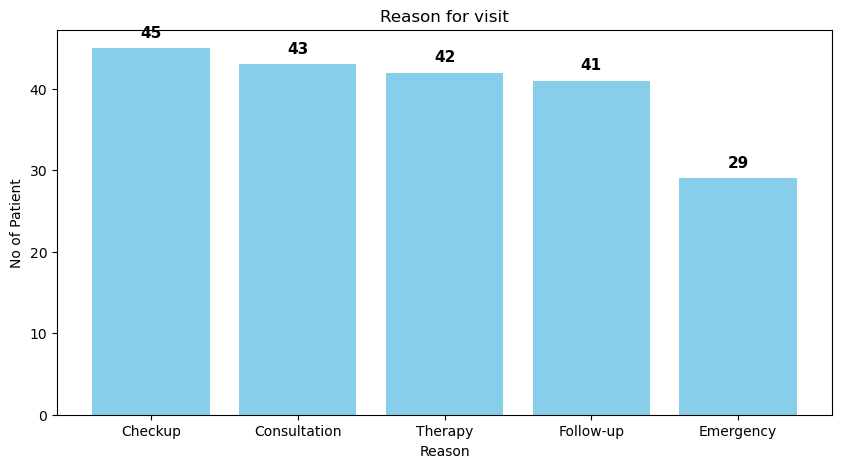

In [17]:
reason = hospital["reason_for_visit"].value_counts()
plt.figure(figsize=(10,5))
plt.bar(reason.index, reason.values, color="skyblue")

for i, val in enumerate(reason.values):
    plt.text(i, val + 1, f"{val}", ha="center", va="bottom", fontsize=11, fontweight="bold")

plt.title("Reason for visit")
plt.xlabel("Reason")
plt.ylabel("No of Patient")
plt.show()

In [44]:
status = (hospital["status"]
    .value_counts()
    .reset_index(name="count")
         )
(status)

,status,count
0,No-show,52
1,Scheduled,51
2,Cancelled,51
3,Completed,46


In [19]:
# group reason for visit by status
reason_by_status = hospital.groupby("reason_for_visit")["status"].value_counts().unstack()
(reason_by_status)

status,Cancelled,Completed,No-show,Scheduled
reason_for_visit,,,,
Checkup,8,16,10,11
Consultation,15,4,11,13
Emergency,8,5,10,6
Follow-up,10,12,6,13
Therapy,10,9,15,8


### What is the payment status of the hospital?

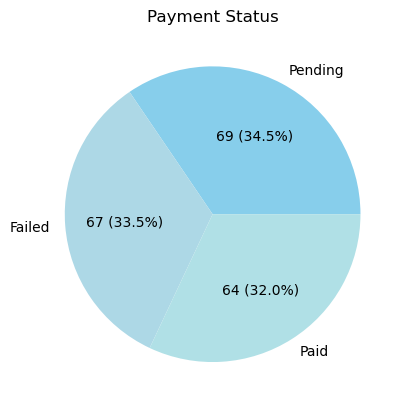

In [20]:
pay_status = hospital["payment_status"].value_counts()

pay_status.plot(kind="pie",
    autopct=lambda pct: f"{int(round(pct/100.*pay_status.sum()))} ({pct:.1f}%)",
    colors=["skyblue", "lightblue", "powderblue"],
    ylabel="")

plt.title("Payment Status")
plt.show()

In [21]:
revenue_by_status = hospital.groupby("payment_status")["cost"].sum()
print(revenue_by_status)


payment_status
Failed     193212.94
Paid       173424.90
Pending    184612.01
Name: cost, dtype: float64


### Payment method vs. Payment status

In [22]:
# group payment method by payment status
pay_mthd_sts = hospital.groupby("payment_method")["payment_status"].value_counts().unstack()
(pay_mthd_sts)

payment_status,Failed,Paid,Pending
payment_method,,,
Cash,23,20,18
Credit Card,23,24,28
Insurance,21,20,23


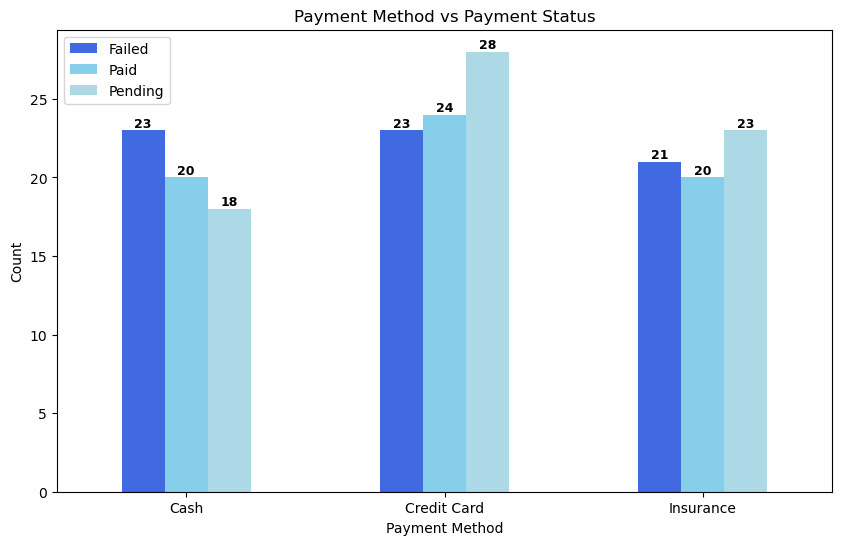

In [23]:
pms = pay_mthd_sts.plot(kind="bar", figsize=(10,6),color = ["royalblue", "skyblue", "lightblue"])

plt.title("Payment Method vs Payment Status")
plt.xlabel("Payment Method")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.legend(loc="upper left")

for container in pms.containers:
    pms.bar_label(container, fontsize=9, fontweight="bold")
plt.show()

### Which treatment type generated most revenue?

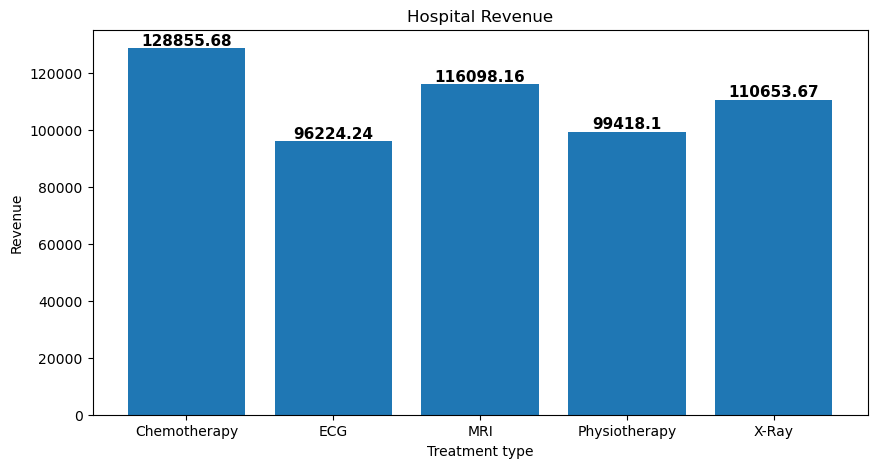

In [24]:
# group treatment type by cost to know which treatment type that generated more revenue
treatment_rev = hospital.groupby("treatment_type")["cost"].sum()

plt.figure(figsize=(10,5))
plt.bar(treatment_rev.index, treatment_rev.values)

for i, val in enumerate(treatment_rev.values):
    plt.text(i, val + 1, f"{val}", ha="center", va="bottom", fontsize=11, fontweight="bold")

plt.title("Hospital Revenue")
plt.xlabel("Treatment type")
plt.ylabel("Revenue")
plt.show()

### Treatment type vs Description

In [25]:
treatment_desc = hospital.groupby("treatment_type")["description"].value_counts().unstack()
(treatment_desc)

description,Advanced protocol,Basic screening,Standard procedure
treatment_type,,,
Chemotherapy,12,12,25
ECG,21,8,9
MRI,11,15,10
Physiotherapy,10,10,16
X-Ray,11,13,17


### Monthly Appointment

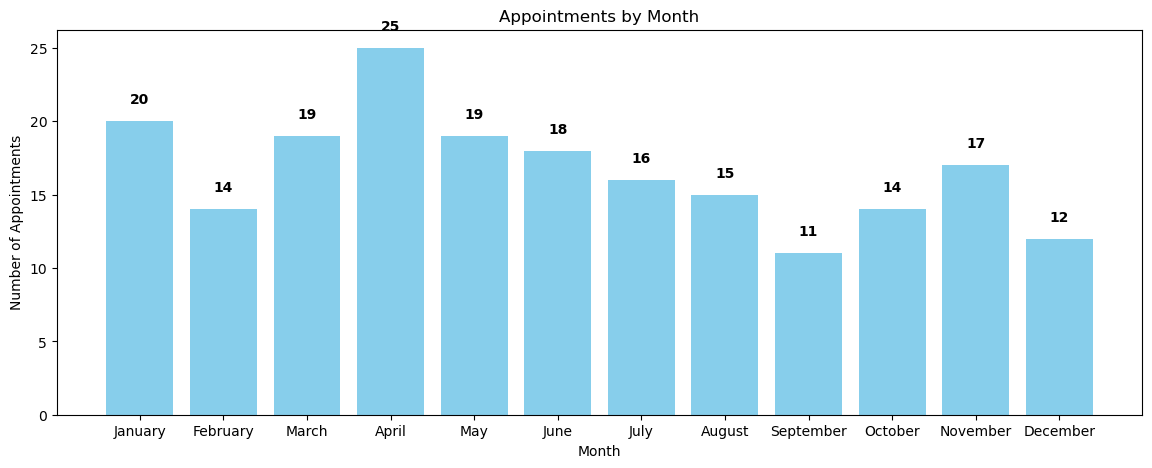

In [26]:
# Extracting month number and month name
hospital["month_num"] = hospital["appointment_date"].dt.month
hospital["month_name"] = hospital["appointment_date"].dt.month_name()

# Counting appointments per month in calendar order
monthly_appt = hospital.groupby(["month_num", "month_name"])["appointment_id"].count().reset_index()

plt.figure(figsize=(14,5))
plt.bar(monthly_appt["month_name"], monthly_appt["appointment_id"], color="skyblue")

for i, val in enumerate(monthly_appt["appointment_id"]):
    plt.text(i, val + 1, f"{val}", ha="center", va="bottom", fontsize=10, fontweight="bold")

plt.title("Appointments by Month")
plt.xlabel("Month")
plt.ylabel("Number of Appointments")
plt.show()


###  Expected Revenue by Month

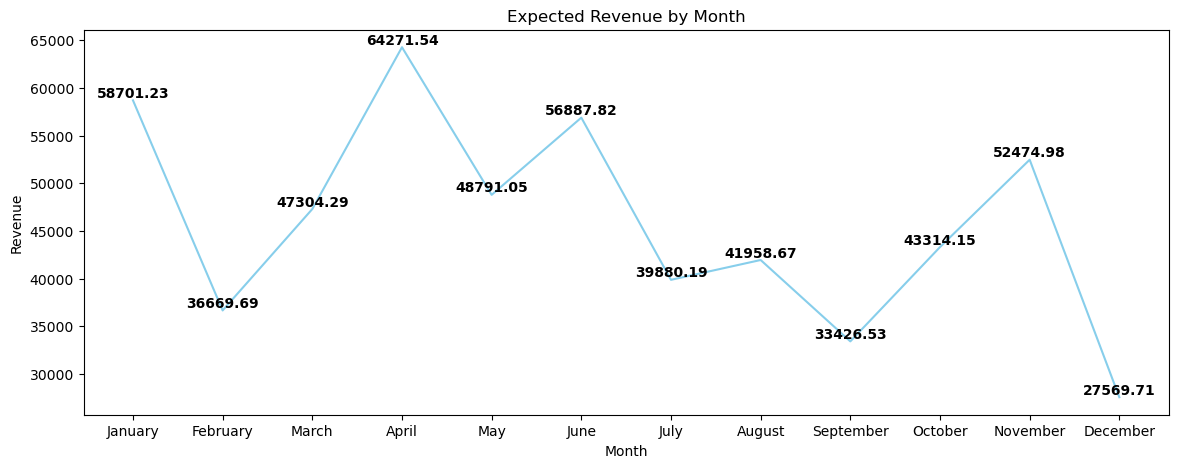

In [27]:
monthly_revenue = hospital.groupby(["month_num", "month_name"])["cost"].sum().round(2).reset_index()

plt.figure(figsize=(14,5))
plt.plot(monthly_revenue["month_name"], monthly_revenue["cost"], color="skyblue")

for i, val in enumerate(monthly_revenue["cost"]):
    plt.text(i, val + 1, f"{val}", ha="center", va="bottom", fontsize=10, fontweight="bold")

plt.title("Expected Revenue by Month")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

### Actual monthly revenue generated

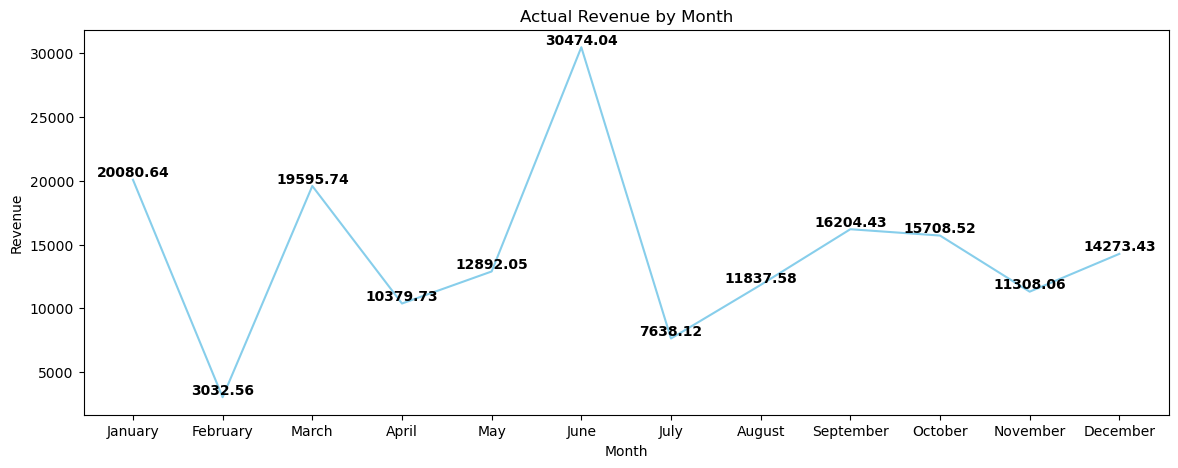

In [28]:
rev =hospital[hospital["payment_status"].str.lower() == "paid"]
monthly_rev = rev.groupby(["month_num", "month_name"])["cost"].sum().round(2).reset_index()

plt.figure(figsize=(14,5))
plt.plot(monthly_rev["month_name"],monthly_rev["cost"] , color="skyblue")

for i, val in enumerate(monthly_rev["cost"]):
    plt.text(i, val + 1, f"{val}", ha="center", va="bottom", fontsize=10, fontweight="bold")

plt.title("Actual Revenue by Month")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

### Which insurance company recorded the most succesful payment?

In [29]:
ins =hospital[(hospital["payment_method"].str.lower() == "insurance") & ( (hospital["payment_status"].str.lower() == "paid"))]
ins_prv = ins.groupby("insurance_provider")["payment_method"].value_counts()
(ins_prv)

insurance_provider  payment_method
MedCare Plus        Insurance         11
PulseSecure         Insurance          5
WellnessCorp        Insurance          4
Name: count, dtype: int64

In [30]:
ins =hospital[(hospital["payment_method"].str.lower() == "insurance") & ( (hospital["payment_status"].str.lower() == "paid"))]
ins_rev = ins.groupby("insurance_provider")["cost"].sum()
(ins_rev)

insurance_provider
MedCare Plus    34103.89
PulseSecure     17962.86
WellnessCorp     8289.74
Name: cost, dtype: float64

Text(0.5, 1.0, 'Revenue by Insurance Provider')

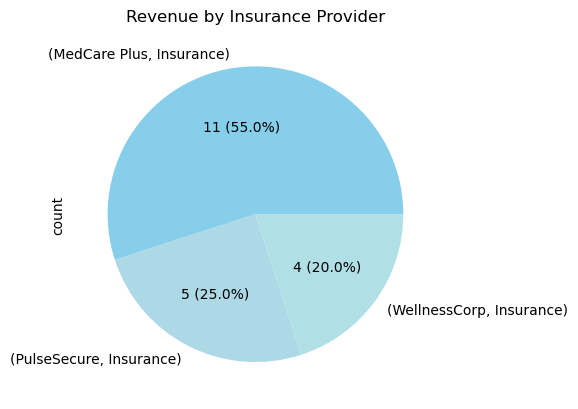

In [31]:
ins_prv.plot(kind = "pie", autopct=lambda pct: f"{int(round(pct/100.*ins_prv.sum()))} ({pct:.1f}%)",
             colors = ["skyblue", "lightblue", "powderblue"])
plt.title("Revenue by Insurance Provider")

### Which Dr. billed more?

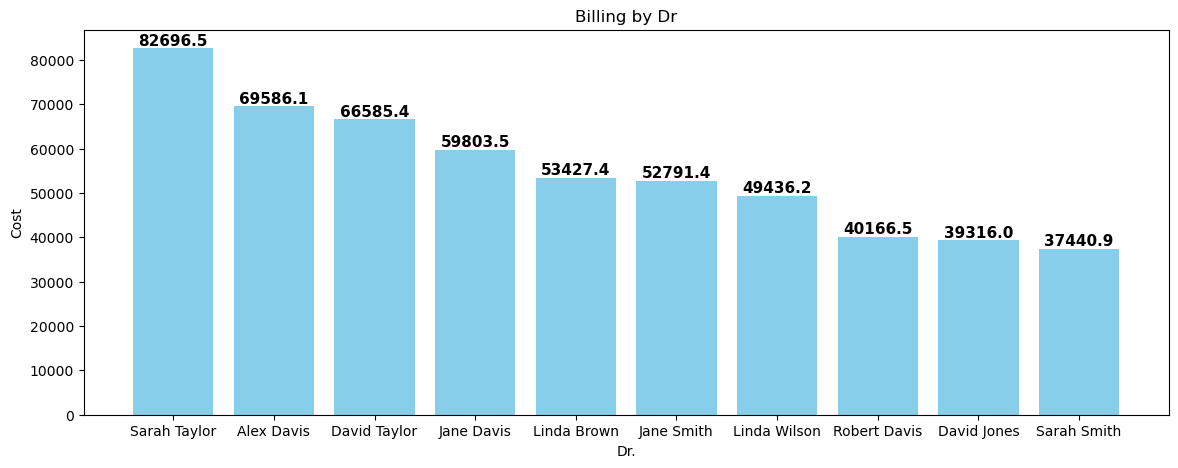

In [32]:
dr_rev = hospital.groupby("dr's_name")["cost"].sum().reset_index().round(1).sort_values("cost", ascending=False)
(dr_rev)
plt.figure(figsize=(14,5))
plt.bar(dr_rev["dr's_name"], dr_rev["cost"], color="skyblue")

for i, val in enumerate(dr_rev["cost"]):
    plt.text(i, val + 1, f"{val}", ha="center", va="bottom", fontsize=11, fontweight="bold")

plt.title("Billing by Dr")
plt.xlabel("Dr.")
plt.ylabel("Cost")
plt.show()

### Which hospital branch generated more revenue?

In [33]:
clinic = hospital["hospital_branch"].value_counts()
(clinic)

hospital_branch
Central Hospital    84
Eastside Clinic     62
Westside Clinic     54
Name: count, dtype: int64

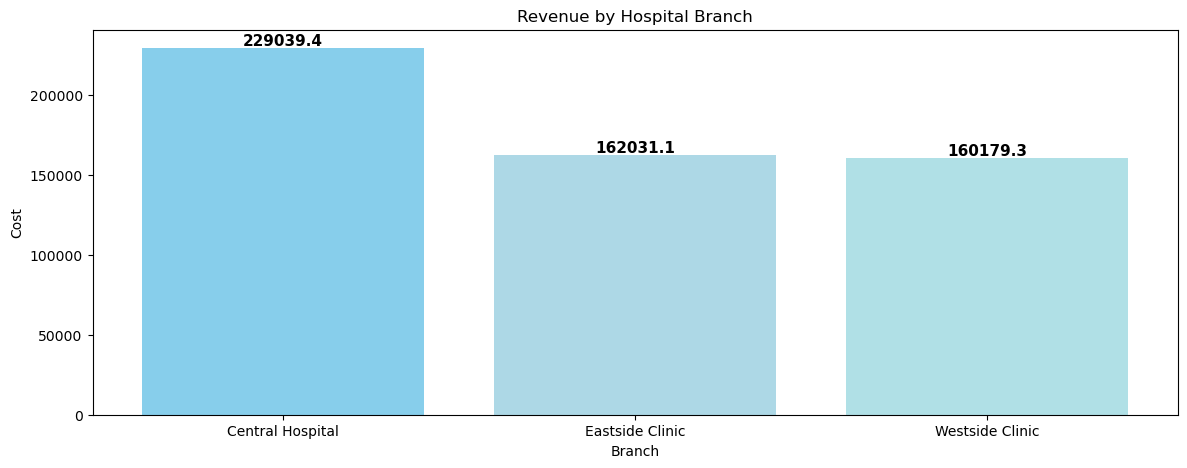

In [34]:
branch = hospital.groupby("hospital_branch")["cost"].sum().reset_index().round(1).sort_values("cost", ascending=False)

plt.figure(figsize=(14,5))
plt.bar(branch["hospital_branch"], branch["cost"], color=["skyblue", "lightblue", "powderblue"])

for i, val in enumerate(branch["cost"]):
    plt.text(i, val + 1, f"{val}", ha="center", va="bottom", fontsize=11, fontweight="bold")

plt.title("Revenue by Hospital Branch")
plt.xlabel("Branch")
plt.ylabel("Cost")
plt.show()

In [35]:
hospital.to_excel("Hospital Management.xlsx")